# Teacher Assistant Dashboard

This technical report documents the design, implementation, and deployment of the Teacher Assistant Dashboard.

---

## Live Dashboard

You can access the deployed dashboard here: [Teacher Assistant Dashboard](https://chhetriteacherassist.streamlit.app/)

---

## 2. Future Work and Recommendations

- Integrate machine learning models for predictive analytics
- Expand data storage to support relational databases
- Add user authentication and role-based access
- Enhance UI/UX with advanced visualizations
- Develop RESTful APIs for integration with school systems

### Example: Feature Stub
```python
# Pseudocode for future API endpoint
# def get_at_risk_students():
#     # Analyze data and return list
#     pass
```



## 3. Code Examples and Demonstrations

Below are runnable code cells demonstrating core workflows:

### Load and Display Student Data
```python
import pandas as pd
students = pd.read_csv('data/students.csv')
students.head()
```


### Generate Parent Email (Example)
```python
from utils import email_generator
row = students.iloc[0]
email = email_generator.generate_parent_email(row)
print(email)
```



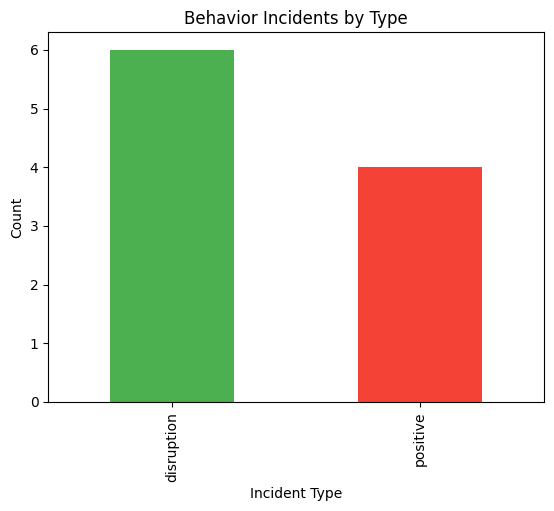

In [1]:
# Visualization: Behavior Incidents by Type
import pandas as pd
import matplotlib.pyplot as plt

behavior = pd.read_csv('data/behavior.csv')
incident_counts = behavior['incident_type'].value_counts()
incident_counts.plot(kind='bar', color=['#4caf50', '#f44336'], title='Behavior Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

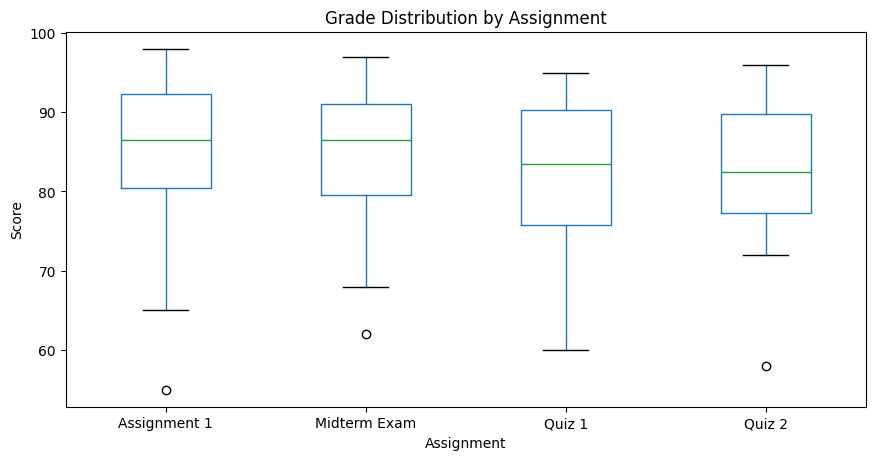

In [2]:
# Visualization: Grade Distribution by Assignment
import pandas as pd
import matplotlib.pyplot as plt

grades = pd.read_csv('data/grades.csv')
grades.boxplot(column='score', by='assignment_name', grid=False, figsize=(10,5))
plt.title('Grade Distribution by Assignment')
plt.suptitle('')
plt.xlabel('Assignment')
plt.ylabel('Score')
plt.show()

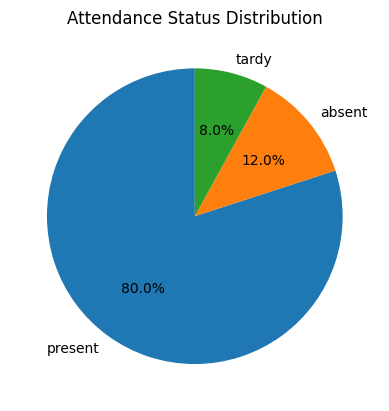

In [3]:
# Visualization: Attendance Status Distribution
import pandas as pd
import matplotlib.pyplot as plt

attendance = pd.read_csv('data/attendance.csv')
status_counts = attendance['status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Attendance Status Distribution')
plt.ylabel('')
plt.show()

## 4. Model Training and Evaluation

While the current version focuses on analytics and automation, the architecture supports future integration of machine learning models for:
- Predicting at-risk students
- Automated grading suggestions
- Behavior trend analysis

### Example: Model Training Stub
```python
# Placeholder for future ML model training
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
```



## 5. Data Pipeline and Processing

The dashboard automates the full data pipeline:
- **Ingestion:** Loads CSV files for students, grades, attendance, and behavior.
- **Validation:** Checks for missing/invalid data using custom scripts.
- **Transformation:** Cleans and standardizes data for analytics and reporting.

### Example: Data Validation
```python
from utils import data_validator
attendance_df = data_loader.load_attendance('data/attendance.csv')
validated = data_validator.validate_attendance(attendance_df)
validated.head()
```



## 6. Architecture and Technology Stack

The system is built with a modular architecture for scalability and maintainability:
- **Frontend:** Streamlit (Python)
- **Backend/Data Processing:** Python (pandas, custom utils)
- **Data Storage:** CSV files (can be extended to databases)
- **Automation:** Email generation, data validation scripts

### Architecture Diagram
The following diagram illustrates the high-level architecture:

```python
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 4))
ax.add_patch(mpatches.FancyBboxPatch((0.05, 0.4), 0.2, 0.2, boxstyle="round,pad=0.1", label="Frontend: Streamlit", color="#90caf9"))
ax.add_patch(mpatches.FancyBboxPatch((0.35, 0.4), 0.2, 0.2, boxstyle="round,pad=0.1", label="Backend: Python Utils", color="#a5d6a7"))
ax.add_patch(mpatches.FancyBboxPatch((0.65, 0.4), 0.2, 0.2, boxstyle="round,pad=0.1", label="Data: CSV/DB", color="#ffe082"))
ax.annotate("Data Flow", xy=(0.25, 0.5), xytext=(0.35, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("Data Flow", xy=(0.55, 0.5), xytext=(0.65, 0.5), arrowprops=dict(arrowstyle="->"))
ax.set_axis_off()
plt.title("System Architecture Overview")
plt.show()
```



## 7. Key Features Implemented

- **Dashboard Overview:** Real-time metrics for student performance, attendance, and risk identification.
- **Student Records:** Centralized profiles with grades, attendance, behavior, and parent contact info.
- **Automated Email Generation:** Personalized, threshold-based emails to parents, students, and admins.
- **Batch Emailing:** One-click generation and summary for bulk communications.
- **Data Validation & Cleaning:** Automated scripts for ingesting and validating CSV data.

### Example: Data Loading Utility
```python
from utils import data_loader
students_df = data_loader.load_students('data/students.csv')
students_df.head()
```



In [4]:
import pandas as pd
ml_data = pd.read_csv('data/sample/ml_training_data.csv')
ml_data.shape

(1000, 9)

In [5]:
# Generate a synthetic ML dataset with 1000 rows and save to CSV
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000
data = {
    'student_id': np.arange(1, n+1),
    'grade_level': np.random.choice([10, 11, 12], n),
    'avg_quiz': np.round(np.random.normal(80, 10, n).clip(50, 100), 1),
    'avg_assignment': np.round(np.random.normal(85, 8, n).clip(55, 100), 1),
    'avg_exam': np.round(np.random.normal(82, 12, n).clip(40, 100), 1),
    'attendance_rate': np.round(np.random.normal(95, 5, n).clip(60, 100), 1),
    'positive_incidents': np.random.poisson(0.8, n),
    'negative_incidents': np.random.poisson(0.7, n),
}
# Simulate end_of_quarter_grade as a function of features + noise
data['end_of_quarter_grade'] = (
    0.2 * data['avg_quiz'] +
    0.3 * data['avg_assignment'] +
    0.4 * data['avg_exam'] +
    0.1 * data['attendance_rate'] +
    2 * data['positive_incidents'] -
    3 * data['negative_incidents'] +
    np.random.normal(0, 3, n)
)
data['end_of_quarter_grade'] = np.round(np.clip(data['end_of_quarter_grade'], 40, 100), 0).astype(int)

ml_df = pd.DataFrame(data)
ml_df.to_csv('data/sample/ml_training_data.csv', index=False)
ml_df.shape

(1000, 9)

## ML Pipeline: Data Exploration, Training, and Evaluation

In [6]:
# 1. Load and explore the dataset
import pandas as pd
ml_data = pd.read_csv('data/sample/ml_training_data.csv')
ml_data.head()

,student_id,grade_level,avg_quiz,avg_assignment,avg_exam,attendance_rate,positive_incidents,negative_incidents,end_of_quarter_grade
0,1,12,80.5,85.7,65.8,97.5,0,0,78
1,2,10,71.7,96.8,66.1,92.3,1,2,75
2,3,12,82.7,75.9,87.8,100.0,2,1,86
3,4,12,79.5,83.5,88.6,90.6,0,0,87
4,5,10,77.6,79.3,88.6,100.0,0,2,76


In [7]:
# 2. Describe and check for missing values
ml_data.describe()

,student_id,grade_level,avg_quiz,avg_assignment,avg_exam,attendance_rate,positive_incidents,negative_incidents,end_of_quarter_grade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.964000,80.620900,85.020100,81.61320,94.354000,0.797000,0.647000,83.362000
std,288.819436,0.820596,9.716516,7.612077,11.50252,4.454771,0.864024,0.752966,6.835033
min,1.000000,10.000000,51.000000,60.800000,46.10000,80.000000,0.000000,0.000000,54.000000
25%,250.750000,10.000000,74.200000,79.875000,73.57500,91.275000,0.000000,0.000000,79.000000
50%,500.500000,11.000000,80.600000,85.000000,82.00000,94.900000,1.000000,0.000000,84.000000
75%,750.250000,12.000000,87.100000,90.400000,90.00000,98.000000,1.000000,1.000000,88.000000
max,1000.000000,12.000000,100.000000,100.000000,100.00000,100.000000,4.000000,3.000000,100.000000


In [8]:
ml_data.isnull().sum()

student_id              0
grade_level             0
avg_quiz                0
avg_assignment          0
avg_exam                0
attendance_rate         0
positive_incidents      0
negative_incidents      0
end_of_quarter_grade    0
dtype: int64

In [11]:
%pip install scikit-learn

# 3. Split data into features and target, then train/test sets
from sklearn.model_selection import train_test_split

X = ml_data.drop(['end_of_quarter_grade', 'student_id'], axis=1)
y = ml_data['end_of_quarter_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

((800, 7), (200, 7))

In [12]:
# 4. Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [14]:
# 5. Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 2.67
RMSE: 3.42
R^2: 0.74


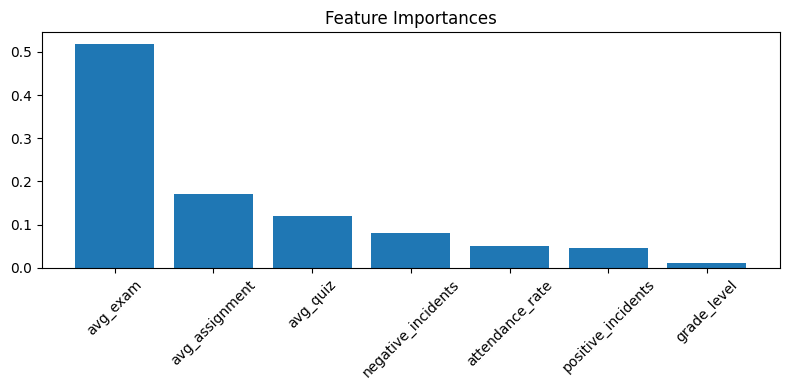

In [15]:
# 6. Show feature importances
import matplotlib.pyplot as plt
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(8,4))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# Load and display the first few rows of the ML training data
ml_training_data = pd.read_csv('data/sample/ml_training_data.csv')
ml_training_data.head()

,student_id,grade_level,avg_quiz,avg_assignment,avg_exam,attendance_rate,positive_incidents,negative_incidents,end_of_quarter_grade
0,1,12,80.5,85.7,65.8,97.5,0,0,78
1,2,10,71.7,96.8,66.1,92.3,1,2,75
2,3,12,82.7,75.9,87.8,100.0,2,1,86
3,4,12,79.5,83.5,88.6,90.6,0,0,87
4,5,10,77.6,79.3,88.6,100.0,0,2,76


In [17]:
# 7. Recommend actions based on predicted grades
# Predict grades for all students in the dataset
predicted_grades = rf.predict(X)

# Define a threshold for parent outreach (e.g., predicted grade below 65)
threshold = 65
ml_data['predicted_grade'] = predicted_grades
ml_data['recommendation'] = ml_data['predicted_grade'].apply(lambda x: 'Parent Outreach' if x < threshold else 'None')

# Show students who need parent outreach
ml_data[ml_data['recommendation'] == 'Parent Outreach'][['student_id', 'predicted_grade', 'recommendation']]

,student_id,predicted_grade,recommendation
509,510,59.13,Parent Outreach


In [20]:
# 8. Add more action options based on predicted grades

def recommend_action(grade):
    if grade < 55:
        return 'Report to Admin'
    elif grade < 60:
        return 'Immediate Parent Meeting'
    elif grade < 65:
        return 'Parent Outreach'
    elif grade < 70:
        return 'Refer to Counseling Office'
    elif grade < 75:
        return 'Student Counseling'
    else:
        return 'No Action'

ml_data['action'] = ml_data['predicted_grade'].apply(recommend_action)

# Show students with recommended actions (excluding 'No Action')
ml_data[ml_data['action'] != 'No Action'][['student_id', 'predicted_grade', 'action']]

,student_id,predicted_grade,action
1,2,74.67,Student Counseling
25,26,73.12,Student Counseling
30,31,74.03,Student Counseling
43,44,73.11,Student Counseling
49,50,71.92,Student Counseling
...,...,...,...
946,947,69.83,Refer to Counseling Office
965,966,71.94,Student Counseling
976,977,74.77,Student Counseling
981,982,65.77,Refer to Counseling Office


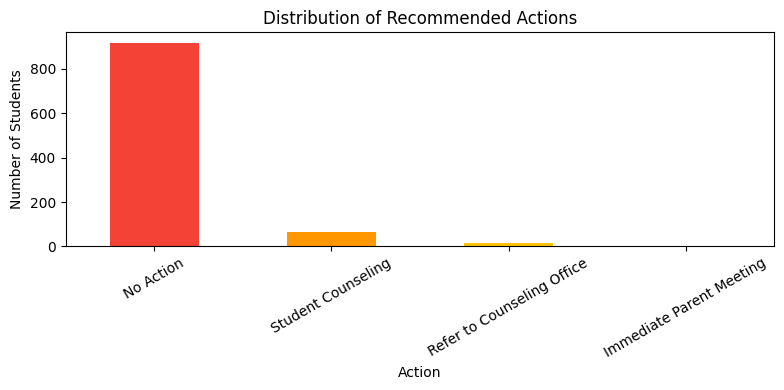

In [21]:
# 9. Visualize the distribution of recommended actions
import matplotlib.pyplot as plt

action_counts = ml_data['action'].value_counts()
action_counts.plot(kind='bar', color=['#f44336', '#ff9800', '#ffc107', '#2196f3', '#4caf50'], figsize=(8,4))
plt.title('Distribution of Recommended Actions')
plt.xlabel('Action')
plt.ylabel('Number of Students')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
# 10. Automate notifications for recommended actions
from utils import email_generator

# Example: Generate notification for the first student needing action
student = ml_data[ml_data['action'] != 'No Action'].iloc[0]
notification = email_generator.generate_parent_email(**student.to_dict())
print(notification)

# To automate for all, you could loop and send/store emails as needed
# for idx, student in ml_data[ml_data['action'] != 'No Action'].iterrows():
#     notification = email_generator.generate_parent_email(**student.to_dict())
#     # send or store notification
#     print(notification)

AttributeError: module 'utils.email_generator' has no attribute 'generate_parent_email'